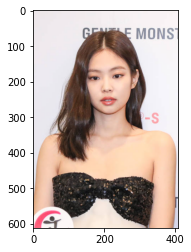

In [17]:
import keras
import tensorflow as tf
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

sample_image = image.load_img("C:/Users/Admin/Desktop/FR Dataset/train/jennie/jennie1.jpg")
plt.imshow(sample_image)

In [18]:
batch_size = 10
height = 224
width = 224
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Admin/Desktop/FR Dataset/train/',
    validation_split=0.2,
    subset = 'training',
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 40 files belonging to 4 classes.
Using 32 files for training.


In [19]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Admin/Desktop/FR Dataset/validation/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size)

Found 40 files belonging to 4 classes.
Using 8 files for validation.


In [20]:
classes = np.array(train_dataset.class_names)
print(classes)

['jennie' 'jisoo' 'lisa' 'rose']


In [21]:
for i in range(len(classes)):
    print(classes[i])

jennie
jisoo
lisa
rose


In [22]:
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_data = train_dataset.map(lambda x, y: (norm_layer(x), y))
vali_data = validation_dataset.map(lambda x,y: (norm_layer(x),y))
autotune = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=autotune)
vali_data = vali_data.cache().prefetch(buffer_size=autotune)

feature_layer = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

num_classes = len(classes)
model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(num_classes)])
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 3,542,988
Trainable params: 3,508,876
Non-trainable params: 34,112
_________________________________________________________________


In [23]:
import time
import datetime
log_dir = 'logs/fit/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1)

history = model.fit(train_data,validation_data=vali_data,epochs=10,callbacks=tensorboard_callback)
model.save('Final_Model.model')


Epoch 1/10
4/4 [==============================] - 11s 2s/step - loss: 1.3847 - accuracy: 0.3125 - val_loss: 1.3792 - val_accuracy: 0.3750
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 1.3551 - accuracy: 0.9688 - val_loss: 1.3958 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 1.3358 - accuracy: 0.9375 - val_loss: 1.3668 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 1.3226 - accuracy: 1.0000 - val_loss: 1.3649 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 1.3174 - accuracy: 0.9688 - val_loss: 1.3542 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 1.3103 - accuracy: 1.0000 - val_loss: 1.3496 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 1.3062 - accuracy: 1.0000 - val_loss: 1.3453 - val_accuracy: 0.5000
Epoch 8/10
4/4 [========================

INFO:tensorflow:Assets written to: Final_Model.model\assets


INFO:tensorflow:Assets written to: Final_Model.model\assets
D:\Python 3.9.6\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\Python 3.9.6\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [36]:
from tensorflow.keras.utils import load_img, img_to_array
image = load_img('C:/Users/Admin/Desktop/FR Dataset/test/test4.jpg', target_size = (height,width))
image = img_to_array(image)/255.0
image = np.expand_dims(image , axis=0)
images = np.vstack([image])
#preprocessing the image for testing based on the parameter of the model

predicted_batch = model.predict(images)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label = classes[tuple(predicted_id)]
print(predicted_label)


rose


In [37]:
import cv2
import sys
from keras.preprocessing.image import load_img,img_to_array
import numpy as np

image = cv2.imread("C:/Users/Admin/Desktop/FR Dataset/test/d03.jpg")

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    image,
    scaleFactor=1.3,
    minNeighbors=3
)

print("[INFO] Found {0} Faces.".format(len(faces)))
i=1
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 1)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite('Test_'+str(i)+'.jpg', roi_color)
    i+=1



[INFO] Found 4 Faces.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.


In [38]:
file = 'Test_' + '1' + '.jpg'
print("File passes")
image = load_img(file , target_size = (224,224,3))
print("Image loaded")
image = img_to_array(image)/255.0
print("MultiDimensional array develops")
image = np.expand_dims(image , axis=0)
images = np.vstack([image])
print("Model predicts!")
predicted_batch = model.predict(images)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label = classes[tuple(predicted_id)]
print(predicted_label)


File passes
Image loaded
MultiDimensional array develops
Model predicts!
rose


In [39]:
filename = 'Test_' + '2' + '.jpg'
print("File passes")
image = load_img(filename , target_size = (224,224,3))
print("Image loaded")
image = img_to_array(image)/255.0
print("MultiDimensional array develops")
image = np.expand_dims(image , axis=0)
images = np.vstack([image])
print("Model predicts!")
predicted_batch = model.predict(images)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label = classes[(predicted_id)]
print(predicted_label)

File passes
Image loaded
MultiDimensional array develops
Model predicts!
rose


C:\Users\Admin\AppData\Local\Temp/ipykernel_10496/1096830022.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  predicted_label = classes[(predicted_id)]


In [40]:
filename = 'Test_' + '3' + '.jpg'
print("File passes")
image = load_img(filename , target_size = (224,224,3))
print("Image loaded")
image = img_to_array(image)/255.0
print("MultiDimensional array develops")
image = np.expand_dims(image , axis=0)
images = np.vstack([image])
print("Model predicts!")
predicted_batch = model.predict(images)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label = classes[(predicted_id)]
print(predicted_label)

File passes
Image loaded
MultiDimensional array develops
Model predicts!
rose


C:\Users\Admin\AppData\Local\Temp/ipykernel_10496/1480856857.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  predicted_label = classes[(predicted_id)]


In [41]:
filename = 'Test_' + '4' + '.jpg'
print("File passes")
image = load_img(filename , target_size = (224,224,3))
print("Image loaded")
image = img_to_array(image)/255.0
print("MultiDimensional array develops")
image = np.expand_dims(image , axis=0)
images = np.vstack([image])
print("Model predicts!")
predicted_batch = model.predict(images)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label = classes[tuple(predicted_id)]
print(predicted_label)

File passes
Image loaded
MultiDimensional array develops
Model predicts!
rose


In [30]:
import xlwt
from xlwt import Workbook
import numpy as np

name_list=np.array(['jennie','jisoo', 'lisa', 'rose'])

wb=Workbook()
style = xlwt.easyxf('font: bold 1')
sheet = wb.add_sheet('Day 1')

j=1
sheet.write(0,0,'Sl.No',style)
sheet.write(0,1,'Members',style)
sheet.write(0,2,'P/A',style)
for i in range(len(classes)):
    sheet.write(j,0,i) #sno
    j+=1
i=0
while(i<4):
    if(classes[i]==name_list[i]):
        sheet.write(i+1,1,classes[i])
        sheet.write(i+1,2,'P')
        i+=1
    else:
        sheet.write(i+1,1,classes[i])
        sheet.write(i+1,2,'A')
        i+=1

wb.save('Attendance_Sheet.xls')